# SVD : 특이값 분해
- SVD : Singular Value Decomposition
- SVD는 PCA와 달리 정방행렬 뿐만 아니라 행과 열의 크기가 다른 (m x n)행렬도 분해 가능
---

## 1. image 불러오기
Image link : https://user-images.githubusercontent.com/88031549/197663439-5dd6eda1-ae9b-4d4f-be78-69fc256eba43.jpg

In [1]:
# Image 불러오기
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

image size : <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2048x1727 at 0x7FEAC9AA2730>


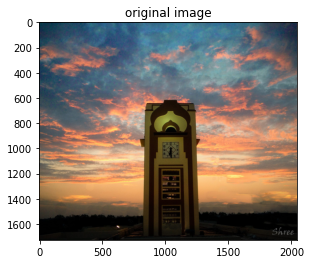

In [5]:
%matplotlib inline
img = Image.open("../datasets/image/compression.jpg")
print(f'image size : {img}')

plt.title("original image")
plt.imshow(img)

image size : <PIL.Image.Image image mode=LA size=2048x1727 at 0x7FEAA9873340>


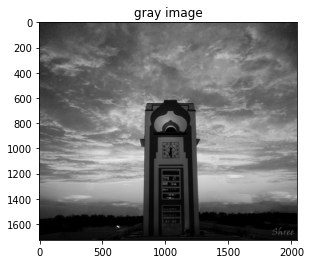

In [12]:
%matplotlib inline
gray_img = img.convert("LA") # 흑백으로
print(f'image size : {gray_img}')

plt.title("gray image")
plt.imshow(gray_img)

## 2. 이미지를 데이터로 변환

In [25]:
gray_img = img.convert("LA")
print(gray_img.size)

imgmat = np.array(list(gray_img.getdata(band=0)), float) # 이미지를 데이터로
imgmat.shape = (gray_img.size[1], gray_img.size[0]) # 데이터 shape을 -> 이미지 사이즈의 반대로!
imgmat.shape

(2048, 1727)


(1727, 2048)

[[44. 46. 49. ... 47. 44. 41.]
 [51. 50. 50. ... 46. 46. 46.]
 [57. 54. 52. ... 43. 47. 50.]
 ...
 [ 7.  7.  6. ...  5.  5.  5.]
 [ 6.  6.  6. ...  6.  5.  5.]
 [ 5.  5.  5. ...  5.  4.  4.]]


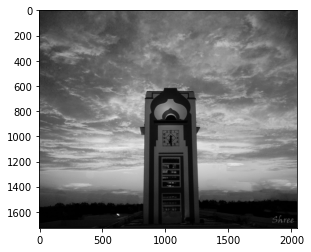

In [26]:
imgmat = np.matrix(imgmat) # array를 matrix로
print(imgmat)
plt.imshow(imgmat, cmap="gray")
plt.show()

## 3. 특이값 분해(U, 시그마, V.T)

In [47]:
# 매트릭스 하나를 u, 시그마, V_transpose 3개로 나눈다.
print("After compression")
U, S, VT = np.linalg.svd(imgmat) # u 시그마 v.T
print(U.shape, S.shape, VT.shape)

After compression
(1727, 1727) (1727,) (2048, 2048)
zsh:1: unknown file attribute: h


![image](https://user-images.githubusercontent.com/88031549/197663015-3ca1ea02-55c8-4472-a3ff-09fcffe11f81.png)


## 4. 특성추출 및 비교

전체 데이터(1727, 2048)를 통해 만든 U, S, VT가 있고  
이 3개의 matrix의 컬럼 중 5 or 25 or 45 or 65개만 가져와도 특성이 잘 유지 되는가를 보자!  
-> 45 이상은 거이 비슷. 45개만으로도 충분히 특성 유지가 가능하다!
> 여기서 원본 데이터 크기와 특성추출한 데이터의 size 같다. -> size는 같으니 굳이 해야할 이유는? 이라고 생각할 수 있음  
> -> 다만 특성추출한 데이터 안에는 0과 같은 데이터가 존재하여 연산이 쉬워진다.

(1727, 2048)


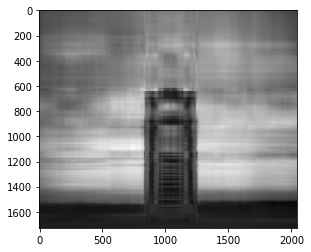

(1727, 2048)


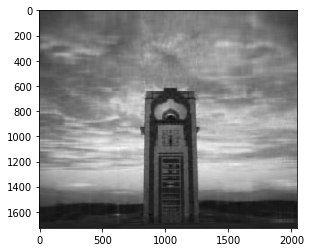

(1727, 2048)


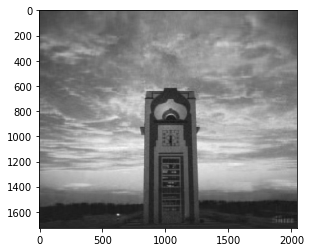

(1727, 2048)


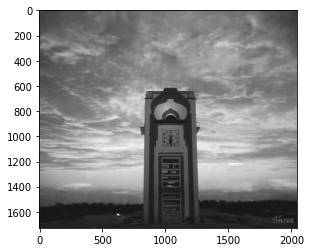

In [49]:
for i in range(5, 70, 20): # i = 5, 25, 45, 65
    cmpimg = np.matrix(U[:, :i]) * np.diag(S[:i]) * np.matrix(VT[:i, :])
    print(cmpimg.shape)
    plt.imshow(cmpimg, cmap="gray")
    plt.show()
    result = Image.fromarray(cmpimg.astype(np.uint8))
# result.save("../datasets/image/compressed.jpg") #이미지 저장

---
# SVD 실습

In [55]:
from random import random
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

# 원본 행렬을 출력하고, SVD를 적용할 경우 U, Sigma, Vt의 차원 확인
np.random.seed(121)
matrix = np.random,random((6, 6))
print("원본행렬:\n", matrix)
U, Sigma, Vt = svd(matrix, full_matrices=False)
print("\n분해 행렬 차원:", U.shape, Sigma.shape, Vt.shape)
print("\nSigma값 행렬:", Sigma)

# Truncated SVD로 Sigma 행렬의 특이값을 4개로 하여 Truncated SVD 수행.
num_components = 4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k = num_components)
print("\nTruncated SVD 분해 행렬 차원:", U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print("\nTruncated SVD Sigma값 행렬:", Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr, np.diag(Sigma_tr)), Vt_tr) # TruncatedSVD 아웃풋

print("\nTruncated SVD로 분해 후 복원 행력: \n", matrix_tr)

TypeError: random() takes no arguments (1 given)

## 2. 사이킷런 TruncatedSVD로 특이값 추출

Text(0, 0.5, 'TruncatedSVD Component 2')

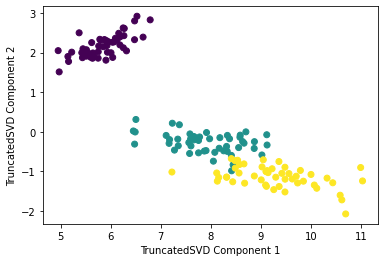

In [57]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data

# 2개의 주요 component로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components=2)
iris_tsvd = tsvd.fit_transform(iris_ftrs)

# Scatter plot 2차원으로 TruncatedSVD 변환된 데이터 표현. 품종은 색깔로 구분
plt.scatter(x=iris_tsvd[:,0], y=iris_tsvd[:,1], c=iris.target)
plt.xlabel("TruncatedSVD Component 1")
plt.ylabel("TruncatedSVD Component 2")

In [ ]:
from sklearn.preprocessing import StandardScaler

# iris 데이터를 StandardScaler로 변환
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris.data)

# 스케일링된 데이터를 기반으로 TruncatedSVD 변환 수행
tsvd = TruncatedSVD(n_components=2)
tsvd.fit_transform(iris_scaled)

#스케일링된 데이터를 기반으로 PCA 변환 수행
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_scaled)

# TruncatedSVD 변환 데이터를 왼쪽에, PCA변환 데이터를 오른쪽에 표현
fig, (ax1, )
